In [ ]:
!pip install pyspark pandas matplotlib wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=c43ea1c9931ef56f4af0fd6ca45f0413f18c6a14e18969985b1228dbee5d1901
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/ .cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (22.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and direc

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import split, col
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import sys
import codecs
from matplotlib import font_manager

plt.rc('font', family='NanumBarunGothic')

In [ ]:
# Step 1: Create a Spark session
spark = SparkSession.builder.appName("WordCloud").getOrCreate()


In [ ]:
# Step 2: Read the input file into a PySpark DataFrame
# input_file_path = "catnip_output.txt"
input_file_path = "poverty.txt"

data= spark.read.text(input_file_path)

# font path
font='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

In [ ]:
# Tokenization and Word Count
words_df = data.select(split(data["value"], "\t").alias("data")).selectExpr("data[0] as word", "cast(data[1] as int) as count")

# Collect data from DataFrame
word_count_dict = dict(words_df.rdd.map(lambda x: (x.word, x["count"])).collect())

# Assuming 'words_df' is your DataFrame with columns 'word' and 'count'
top_20_words = words_df.orderBy(col("count").desc()).limit(20)

# Show the result
top_20_words.show()


+--------+-----+
|    word|count|
+--------+-----+
|    연금| 7736|
|    소득| 4084|
|    정부| 3988|
|    사회| 3653|
|    개혁| 2877|
|    기초| 2873|
|국민연금| 2857|
|  일자리| 2760|
|    경제| 2545|
|    문제| 2382|
|    정책| 2276|
|    고령| 2155|
|    복지| 2016|
|    한국| 2015|
|    인구| 1931|
|    국민| 1860|
|    만원| 1785|
|    제도| 1757|
|    지원| 1756|
|    필요| 1647|
+--------+-----+



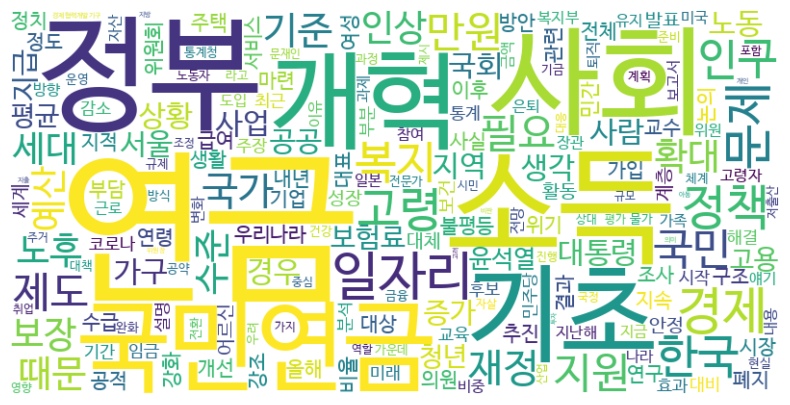

In [ ]:
# Generate WordCloud
wordcloud = WordCloud(font_path=font, width=800, height=400, background_color="white").generate_from_frequencies(word_count_dict)

# Display the WordCloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()